<a href="https://colab.research.google.com/github/Priya-Samanta/FuzzySystems/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuzzy Logic

## Python modules

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
from itertools import product

# Speed Limit

## Creating Dataset

In [ ]:
data_list = []
for i in range (10,151,10):
  data_list.append(i)
column_name = ['Speed']
data_frame = pd.DataFrame(data_list , columns = column_name)

data_frame

,Speed
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


## Fuzzy Set A(Low_Speed_Limit)

In [ ]:
def fuzzy_membership_A(x):
  if x < 30 :
    return 1
  elif x >= 30 and x < 50 :
    return (x-30) / (50-30)
  elif x >= 50 and x < 70 :
    return (x-50) / (70-50)
  else :
    return 0

In [ ]:
membership_values_A = [fuzzy_membership_A(speed) for speed in data_list]
membership_values_A

[1, 1, 0.0, 0.5, 0.0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Fuzzy Set B(High_Speed_Limit)

In [ ]:
def fuzzy_membership_B(x) :
  if x < 60 :
    return 0
  elif x>=60 and x<80 :
    return (x-60) / (80-60)
  elif x>=80 and x<100 :
    return (x-80) / (100-80)
  else:
    return 1

In [ ]:
membership_values_B = [fuzzy_membership_B(speed) for speed in data_list]
membership_values_B

[0, 0, 0, 0, 0, 0.0, 0.5, 0.0, 0.5, 1, 1, 1, 1, 1, 1]

## Union of fuzzy set A and B

In [ ]:
def fuzzy_union(A, B):
    membership_values_C = [max(a,b) for a,b in zip(A,B)]
    return membership_values_C

In [ ]:
membership_values_C = fuzzy_union(membership_values_A,membership_values_B)
membership_values_C

[1, 1, 0.0, 0.5, 0.0, 0.5, 0.5, 0, 0.5, 1, 1, 1, 1, 1, 1]

## Intersection of fuzzy set A and B

In [ ]:
def fuzzy_intersection(A, B):
  membership_values_D = [min(a,b) for a,b in zip(A,B)]
  return membership_values_D

In [ ]:
membership_values_D = fuzzy_intersection(membership_values_A,membership_values_B)
membership_values_D

[0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Membership curve

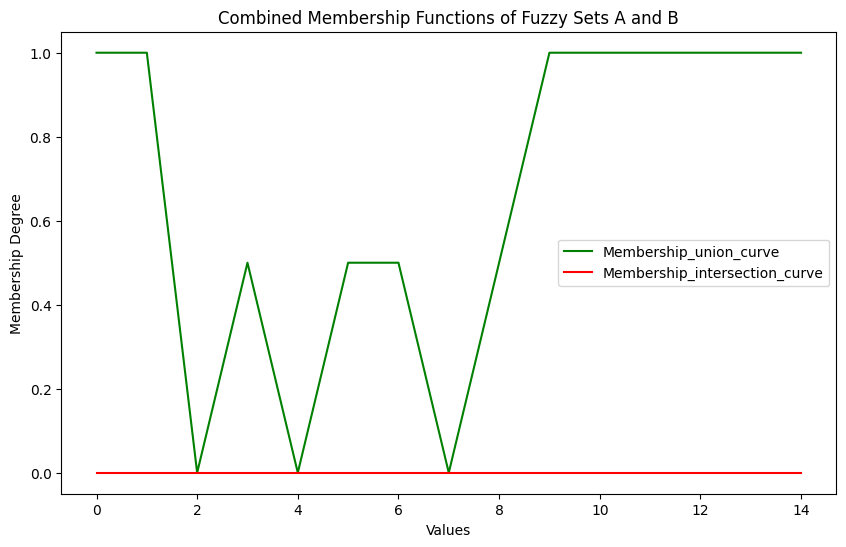

In [ ]:
plt.figure(figsize=(10, 6))
values = list(range(len(membership_values_C)))
plt.plot(values, membership_values_C, label='Membership_union_curve', color='green')
values = list(range(len(membership_values_D)))
plt.plot(values, membership_values_D, label='Membership_intersection_curve', color='red')
plt.xlabel('Values')
plt.ylabel('Membership Degree')
plt.title('Combined Membership Functions of Fuzzy Sets A and B')
plt.legend()
plt.show()

# Temprature

## Creating Dataset

In [ ]:
data_list = []
for i in range (-10,51,5):
  data_list.append(i)
column_name = ['Temprature']
data_frame = pd.DataFrame(data_list , columns = column_name)

data_frame

,Temprature
0,-10
1,-5
2,0
3,5
4,10
5,15
6,20
7,25
8,30
9,35


## Fuzzy Set C(Cold)

In [ ]:
def fuzzy_set_C(x):
  if x < -10 :
    return 0
  elif x >= -10 and x < 0 :
    return (x-(-10))/(0-(-10))
  elif x >= 0 and x < 5 :
    return 1
  else :
    return 0

In [ ]:
membership_val_C = [fuzzy_set_C(t) for t in data_list]
val_C = np.array(membership_val_C)
val_C

array([0. , 0.5, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

## Fuzzy Set D(Warm)

In [ ]:
def fuzzy_set_D(x):
  if x < 25 :
    return 0
  elif x >= 25 and x < 35 :
    return (x-25)/(35-25)
  elif x >= 35 and x < 40 :
    return 1
  else :
    return 0

In [ ]:
membership_val_D = [fuzzy_set_D(t) for t in data_list]
val_D = np.array(membership_val_D)
val_D

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 0. , 0. , 0. ])

## Max Min Composition of fuzzy set C and D

In [ ]:
def fuzzy_set_F(C, D):
  T = D.transpose()
  F = []
  for a in T:
    row = [min(a,b) for b in C]
    F.append(row)
  return F

In [ ]:
def maxColumn(my_list):

    m = len(my_list)
    n = len(my_list[0])

    mat = []
    for col in range(n):
        col_max = my_list[0][col]
        for row in range(1, m):

            col_max = max(col_max, my_list[row][col])

        mat.append(col_max)
    return mat


In [ ]:
matrix = fuzzy_set_F(val_C, val_D)
membership_val_F = maxColumn(matrix)
membership_val_F

[0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Membership curve of F(x)

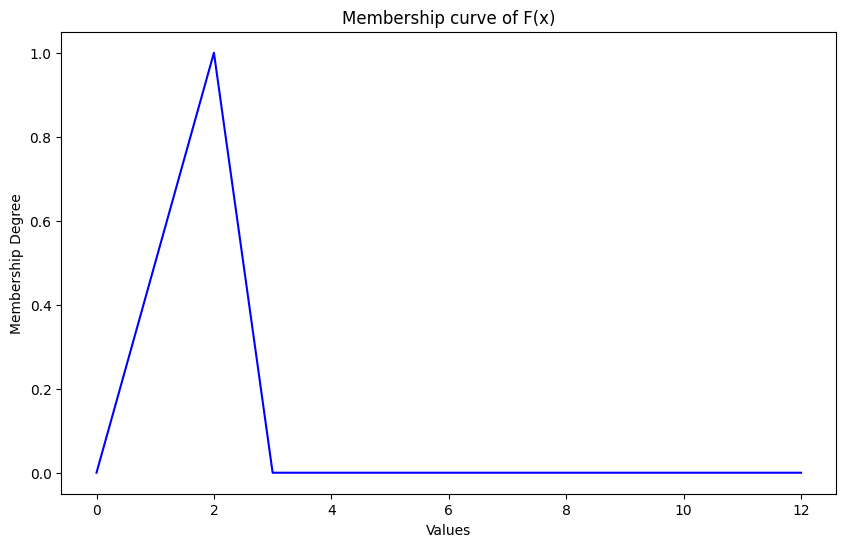

In [ ]:
plt.figure(figsize=(10, 6))
values = list(range(len(membership_val_F)))
plt.plot(values, membership_val_F, label='Membership_curve', color='blue')
plt.xlabel('Values')
plt.ylabel('Membership Degree')
plt.title('Membership curve of F(x)')
plt.show()

# Mamdani Fuzzy Inference System

## Control the FAN-SPEED of a furnace by inputting TEMPERATURE of a thermostat of a household.


In [18]:
def temperature_to_fan_speed(temperature):
    # Defining the membership functions for TEMPERATURE
    risky = 0
    average = 0
    excellent = 0

    # Calculating the degree of membership for each linguistic term
    if temperature <= 30:
        risky = 1.0
    elif temperature <= 50:
        risky = (50 - temperature) / 20.0
        average = (temperature - 30) / 20.0
    elif temperature <= 1:
        average = (70 - temperature) / 20.0
        excellent = (temperature - 50) / 20.0
    else:
        excellent = 1.0

    # Defining membership functions for FAN-SPEED
    slow = 0
    moderate = 0
    high = 0

    # Applying fuzzy rules
    if risky > 0:
        slow = max(slow, risky)
    if average > 0:
        moderate = max(moderate, average)
    if excellent > 0:
        high = max(high, excellent)

    # Defuzzifying using the centroid method
    total_membership = slow + moderate + high
    if total_membership == 0:
        return 0
    else:
        fan_speed = (slow * 100 + moderate * 200 + high * 300) / total_membership
        return fan_speed

## Calculating the crisp value of FAN-SPEED

In [19]:
temperature_input = 85  # Given as example in assignment sheet.
fan_speed_output = temperature_to_fan_speed(temperature_input)

print(f"For a temperature of {temperature_input}°C, the recommended fan speed is {fan_speed_output} RPM.")

For a temperature of 85°C, the recommended fan speed is 300.0 RPM.
